In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -uq /content/drive/MyDrive/cocktail_classifier/Data.zip

In [19]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing, layers
from keras.preprocessing.image import image_dataset_from_directory, ImageDataGenerator
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout, AveragePooling2D, experimental
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
#I was using this method for most of the notebooks, but found flow was much
# easier to add augmentation with.




# traindf = keras.preprocessing.image_dataset_from_directory(
#     '/content/Data/Train Data',
#     labels = 'inferred',
#     label_mode = 'categorical',
#     #class_names = ['Cosmo','Margarita','Mojito'],
#     seed = 7,
#     validation_split = .2,
#     batch_size = 16,
#     subset = 'training')

# valdf = keras.preprocessing.image_dataset_from_directory(
#     '/content/Data/Train Data',
#     labels = 'inferred',
#     label_mode = 'categorical',
#     #class_names = ['Cosmo','Margarita','Mojito'],
#     seed = 7,
#     validation_split = .2,
#     batch_size = 16,
#     subset = 'validation')




Found 3643 files belonging to 10 classes.
Using 2915 files for training.
Found 3643 files belonging to 10 classes.
Using 728 files for validation.


In [ ]:
# testdf = keras.preprocessing.image_dataset_from_directory(
#     '/content/Data/Test Data',
#     labels = 'inferred',
#     label_mode = 'categorical',
#     #class_names
    
# )


Found 499 files belonging to 10 classes.


In [5]:
train_generator = keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 2,
    width_shift_range = 2,
    height_shift_range = 2,
    zoom_range = .3,
    horizontal_flip = True,
    vertical_flip = False,
    data_format = 'channels_last',
    validation_split = .2
)

val_generator = keras.preprocessing.image.ImageDataGenerator(
    data_format = 'channels_last',
    validation_split = .2
)


class_list = [
 'Aperol Spritz',
 'Bloody Mary',
 'Cosmo',
 'Irish Coffee',
 'Margarita',
 'Mimosa',
 'Mojito',
 'Moscow Mule',
 'Old Fashioned',
 'Pina Colada']



flow_traindf = train_generator.flow_from_directory(
    '/content/Data/Train Data',
    target_size = (256, 256),
    color_mode = 'rgb',
    classes = class_list,
    class_mode = 'categorical',
    batch_size = 16,
    seed = 7,
    subset = 'training'
)


flow_valdf = val_generator.flow_from_directory(
    directory = '/content/Data/Train Data',
    target_size = (256, 256),
    color_mode = 'rgb',
    classes = class_list,
    class_mode = 'categorical',
    batch_size = 16,
    seed = 7,
    subset = 'validation'
)


Found 2918 images belonging to 10 classes.
Found 725 images belonging to 10 classes.


In [24]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    data_format = 'channels_last'
)

flow_testdf = test_generator.flow_from_directory(
    directory = '/content/Data/Test Data',
    target_size = (256, 256),
    color_mode = 'rgb',
    classes = ['Aperol Test', 'Bloody Test', 'Cosmo Test', 'Irish Test', 'Margarita Test',
               'Mimosa Test', 'Mojito Test', 'Mule Test', 'Fashioned Test', 'Pina Test'],
    class_mode = 'categorical',
    batch_size = 1,
    shuffle = False,
    #seed = 7,
    #subset = 'validation'
)


Found 449 images belonging to 10 classes.


Running same test as last attempt in keras_prelim notebook, each epoch on local machine took about 30 minutes. Let's check here.

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape = (256, 256, 3)))


model.add(Conv2D(
            filters=10,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(AveragePooling2D())

model.add(Conv2D(
            filters=20,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(AveragePooling2D())

model.add(Conv2D(
            filters=40,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(AveragePooling2D())

model.add(Conv2D(
            filters=60,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(AveragePooling2D())

model.add(Conv2D(
            filters=100,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(AveragePooling2D())


model.add(GlobalAveragePooling2D())

model.add(Dense(100, activation = 'relu'))

model.add(Dense(80, activation = 'relu'))

model.add(Dense(40, activation='relu'))

model.add(Dense(20, activation = 'relu'))

#model.add(Dropout(.20))

model.add(Dense(10, activation='softmax'))  # 3 target classes

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
model.summary()

model.fit(traindf, epochs=10, verbose=1, validation_data=valdf,
       callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 20)      1820      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 40)      7240      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 60)      21660     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 100)     54100     
_________________________________________________________________
global_average_pooling2d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [ ]:
augmented_test = data_augmentation(traindf)

TypeError: ignored

In [ ]:
for images, _ in traindf.take()
  print(len(images))

32
32


In [ ]:
traindf

<BatchDataset shapes: ((None, 256, 256, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))

In [ ]:
x = data_augmentation(inputs)

In [ ]:
x

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'sequential')>

Lets try jsut adding these layers early in the model

In [ ]:
model2 = Sequential()

In [ ]:
from keras.models import Model
from keras.applications import mobilenet_v2
from keras.preprocessing import image

In [ ]:
base = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(256,256,3))

In [ ]:
for layer in base.layers:
  layer.trainable = False

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(60, activation = 'relu')(x)
x = Dense(30, activation = 'relu')(x)
out = Dense(10, activation = 'softmax')(x)

model2 = Model(inputs = base.input, outputs = out)



In [ ]:
model2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
model2.fit(traindf, epochs=20, verbose=1, validation_data=valdf,
       callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Epoch 1/20
92/92 [==============================] - 25s 147ms/step - loss: 2.2587 - accuracy: 0.1732 - val_loss: 2.0078 - val_accuracy: 0.2761


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
92/92 [==============================] - 10s 106ms/step - loss: 1.9420 - accuracy: 0.2962 - val_loss: 1.8121 - val_accuracy: 0.3874
Epoch 3/20
92/92 [==============================] - 10s 105ms/step - loss: 1.7307 - accuracy: 0.3797 - val_loss: 1.7919 - val_accuracy: 0.3874
Epoch 4/20
92/92 [==============================] - 10s 105ms/step - loss: 1.6027 - accuracy: 0.4275 - val_loss: 1.7319 - val_accuracy: 0.3915
Epoch 5/20
92/92 [==============================] - 10s 105ms/step - loss: 1.4374 - accuracy: 0.5155 - val_loss: 1.6897 - val_accuracy: 0.4217
Epoch 6/20
92/92 [==============================] - 10s 105ms/step - loss: 1.4168 - accuracy: 0.5076 - val_loss: 1.6468 - val_accuracy: 0.4258
Epoch 7/20
92/92 [==============================] - 10s 105ms/step - loss: 1.3151 - accuracy: 0.5517 - val_loss: 1.7389 - val_accuracy: 0.4148
Epoch 8/20
92/92 [==============================] - 10s 105ms/step - loss: 1.2388 - accuracy: 0.5713 - val_loss: 1.6487 - val_accuracy: 0.4299

Adding my augmentations before importing mobilenet

In [ ]:
x = data_augmentation(inputs)
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(60, activation = 'relu')(x)
x = Dense(30, activation = 'relu')(x)
out = Dense(10, activation = 'softmax')(x)

model3 = Model(inputs = base.input, outputs = out)



In [ ]:
model3.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

model3.fit(traindf, epochs=20, verbose=1, validation_data=valdf,
       callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Epoch 1/20
183/183 [==============================] - 21s 72ms/step - loss: 2.2546 - accuracy: 0.1551 - val_loss: 2.1393 - val_accuracy: 0.2102


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
183/183 [==============================] - 10s 55ms/step - loss: 1.9352 - accuracy: 0.3047 - val_loss: 1.9102 - val_accuracy: 0.3049
Epoch 3/20
183/183 [==============================] - 10s 54ms/step - loss: 1.7526 - accuracy: 0.3787 - val_loss: 1.8123 - val_accuracy: 0.3599
Epoch 4/20
183/183 [==============================] - 10s 54ms/step - loss: 1.6256 - accuracy: 0.4450 - val_loss: 1.7745 - val_accuracy: 0.3709
Epoch 5/20
183/183 [==============================] - 10s 54ms/step - loss: 1.5104 - accuracy: 0.4844 - val_loss: 1.7404 - val_accuracy: 0.3956
Epoch 6/20
183/183 [==============================] - 10s 54ms/step - loss: 1.4099 - accuracy: 0.5175 - val_loss: 1.7647 - val_accuracy: 0.4052
Epoch 7/20
183/183 [==============================] - 10s 55ms/step - loss: 1.3646 - accuracy: 0.5368 - val_loss: 1.7072 - val_accuracy: 0.4217
Epoch 8/20
183/183 [==============================] - 10s 54ms/step - loss: 1.2625 - accuracy: 0.5783 - val_loss: 1.6472 - val_accuracy:

Switched to Flow method to augment my data. Trying older model without transfer learning



In [10]:
history = History()

Model worked SUPER well, but I was also augmenting val files, not just train. fixing issues and lessening steps per epch for time

In [11]:
model5 = Sequential()

model5.add(InputLayer(input_shape = (256, 256, 3)))


model5.add(Conv2D(
            filters=10,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

#model.add(AveragePooling2D())

model5.add(Conv2D(
            filters=20,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model5.add(AveragePooling2D())

model5.add(Conv2D(
            filters=40,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model5.add(AveragePooling2D())

model5.add(Conv2D(
            filters=60,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model5.add(AveragePooling2D())

model5.add(Conv2D(
            filters=100,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model5.add(AveragePooling2D())


model5.add(GlobalAveragePooling2D())

model5.add(Dense(100, activation = 'relu'))

model5.add(Dense(80, activation = 'relu'))

model5.add(Dense(40, activation='relu'))

model5.add(Dense(20, activation = 'relu'))

model5.add(Dropout(.20))

model5.add(Dense(10, activation='softmax'))  # 3 target classes

model5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
#model4.summary()

history = model5.fit(flow_traindf, epochs=25, verbose=1, validation_data=flow_valdf,
           steps_per_epoch = 800, validation_steps = 300,
       callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Epoch 1/25
800/800 [==============================] - 209s 226ms/step - loss: 2.2032 - accuracy: 0.1919 - val_loss: 1.9099 - val_accuracy: 0.2955
Epoch 2/25
800/800 [==============================] - 181s 227ms/step - loss: 1.8885 - accuracy: 0.3081 - val_loss: 1.6180 - val_accuracy: 0.4163
Epoch 3/25
800/800 [==============================] - 180s 226ms/step - loss: 1.6720 - accuracy: 0.3982 - val_loss: 1.4152 - val_accuracy: 0.5317
Epoch 4/25
800/800 [==============================] - 181s 227ms/step - loss: 1.4192 - accuracy: 0.5006 - val_loss: 1.2000 - val_accuracy: 0.6030
Epoch 5/25
800/800 [==============================] - 182s 228ms/step - loss: 1.2742 - accuracy: 0.5633 - val_loss: 1.0391 - val_accuracy: 0.6610
Epoch 6/25
800/800 [==============================] - 182s 228ms/step - loss: 1.1681 - accuracy: 0.6000 - val_loss: 0.9589 - val_accuracy: 0.6733
Epoch 7/25
800/800 [==============================] - 183s 229ms/step - loss: 1.1034 - accuracy: 0.6247 - val_loss: 0.9639 -

In [ ]:
model5.save('/content/drive/MyDrive/cocktail_classifier')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/cocktail_classifier/assets


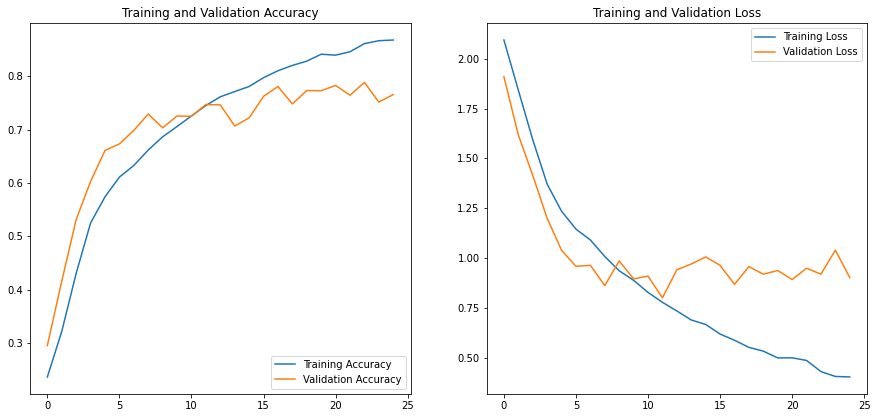

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
model5.evaluate(flow_testdf, steps = 800)

800/800 [==============================] - 3s 4ms/step - loss: 1.0500 - accuracy: 0.7538


[1.0500245094299316, 0.7537500262260437]

In [ ]:
model5.predict(testdf)

array([[6.57380978e-03, 6.30620355e-03, 1.10017856e-04, ...,
        1.93499713e-04, 9.55285907e-01, 1.01603323e-03],
       [1.47892873e-18, 1.25482747e-14, 1.68946779e-09, ...,
        7.05726037e-04, 5.18091196e-16, 2.68993556e-08],
       [3.66326445e-03, 9.93337631e-01, 5.47953998e-04, ...,
        2.64355971e-04, 1.90616434e-03, 1.56834256e-04],
       ...,
       [6.82362440e-07, 6.00872241e-08, 4.84225247e-03, ...,
        4.98362537e-03, 8.30234349e-05, 6.87120631e-02],
       [2.90599564e-06, 5.27339466e-07, 9.99996185e-01, ...,
        8.95074570e-10, 1.90820174e-07, 5.61863800e-08],
       [6.69519475e-04, 1.68892584e-04, 9.04912278e-02, ...,
        3.93255381e-03, 2.48676632e-02, 3.52370329e-02]], dtype=float32)

In [ ]:
def prepare_image(img_path):

    img = image.load_img(img_path, target_size=(256, 256, 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = mobilenet_v2.preprocess_input(x)
    return x



In [ ]:
x = prepare_image('/content/drive/MyDrive/cocktail_classifier/test photo.jpg')

In [ ]:
model5.predict(x)

array([[2.6627758e-01, 3.5118084e-02, 9.4971368e-03, 2.2527233e-03,
        2.9510058e-05, 8.5522290e-03, 4.7650936e-08, 1.7978835e-03,
        6.7050570e-01, 5.9690350e-03]], dtype=float32)

In [ ]:
label_map = (flow_traindf.class_indices)

In [ ]:
label_map

{'Aperol Spritz': 0,
 'Bloody Mary': 1,
 'Cosmo': 2,
 'Irish Coffee': 3,
 'Margarita': 4,
 'Mimosa': 5,
 'Mojito': 6,
 'Moscow Mule': 7,
 'Old Fashioned': 8,
 'Pina Colada': 9}

In [ ]:
model5.predict(x)

array([[3.8657247e-16, 2.8662232e-19, 8.1984105e-08, 4.6735135e-04,
        9.9225545e-01, 2.7153368e-08, 8.3389907e-04, 5.4617806e-07,
        1.6193656e-11, 6.4427019e-03]], dtype=float32)

In [ ]:
model3.predict(x)

array([[2.8147823e-03, 3.0094838e-02, 1.7256105e-03, 2.4136631e-01,
        4.6672667e-03, 5.5119459e-04, 5.3368974e-03, 1.5586336e-03,
        7.0036054e-01, 1.1523946e-02]], dtype=float32)

In [ ]:
x = prepare_image('/content/drive/MyDrive/cocktail_classifier/coffee_tester.jpg')

In [ ]:
model5.predict(x)

array([[8.3700204e-03, 3.0155806e-03, 8.0266595e-02, 4.5634308e-01,
        1.2643020e-02, 1.5473704e-02, 2.8797529e-05, 5.9498181e-03,
        3.0000791e-01, 1.1790137e-01]], dtype=float32)

In [ ]:
model3.predict(x)

array([[9.1842236e-04, 6.3874474e-04, 4.6763371e-04, 3.0702919e-01,
        5.2099724e-05, 2.5901983e-05, 1.0114180e-05, 1.3069029e-01,
        5.5981702e-01, 3.5059004e-04]], dtype=float32)

In [ ]:
output = model5(images)

In [ ]:
preds = model5.predict(x)

NameError: ignored

In [ ]:
preds[0]

array([8.3700204e-03, 3.0155806e-03, 8.0266595e-02, 4.5634308e-01,
       1.2643020e-02, 1.5473704e-02, 2.8797529e-05, 5.9498181e-03,
       3.0000791e-01, 1.1790137e-01], dtype=float32)

In [ ]:
preds.sort_values()

AttributeError: ignored